# negative network

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from glob import glob

#gml_files = glob('../output/network/*/*.gml')

graph = nx.read_gml('../output_join/article_neg1.gml')
ugraph = graph.to_undirected()
U = graph.to_undirected(reciprocal=True)
e = U.edges()
ugraph.add_edges_from(e)

def highest_centrality(cent_dict):
    """Returns a tuple (node,value) with the node
    with largest value from centrality dictionary."""
    # create ordered tuple of centrality data
    cent_items = [(b,a) for (a,b) in cent_dict.iteritems()]
    # sort in descending order
    cent_items.sort()
    cent_items.reverse()
    return tuple(reversed(cent_items[0]))

In [2]:
# start here
#ugraph = nx.read_gml('positive_uall.gml')

print nx.info(graph)
print nx.info(ugraph)

Name: 
Type: MultiDiGraph
Number of nodes: 1257
Number of edges: 1898
Average in degree:   1.5099
Average out degree:   1.5099
Name: 
Type: MultiGraph
Number of nodes: 1257
Number of edges: 1898
Average degree:   3.0199


In [3]:
def drawIt(graph, what = 'graph'):
    nsize = graph.number_of_nodes()
    print "Drawing %s of size %s:" % (what, nsize)
    
    if nsize > 20:
        plt.figure(figsize=(10, 10))
        if nsize > 40:
            nx.draw_spring(graph, with_labels = True, node_size = 70, font_size = 12)
        else:
            nx.draw_spring(graph, with_labels = True)
    else:
        nx.draw_spring(graph, with_labels = True)
    plt.show()

def describeGraph(graph):
    components = sorted(nx.connected_components(graph), key = len, reverse = True)
    cc = [len(c) for c in components]
    subgraphs = list(nx.connected_component_subgraphs(graph))
    params = (graph.number_of_edges(),graph.number_of_nodes(),len(cc))
    print "Graph has %s nodes, %s edges, %s connected components\n" % params
    drawIt(graph)
    for sub in components:
        drawIt(graph.subgraph(sub), what = 'component')

In [5]:
#describeGraph(ugraph)

### Components

In [6]:
# list of connected components (sets of nodes), starting with largest
print [len(c) for c in sorted(nx.connected_components(ugraph), key=len, reverse=True)]

[1140, 7, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [7]:
# generate connected components as subgraphs; Gc is largest component
subgraphs = list(nx.connected_component_subgraphs(ugraph))

# Gc = size of largest component
Gc = max(nx.connected_component_subgraphs(ugraph), key=len)
len(Gc)

1140

### Connectivity

### Degree

In [9]:
# degree histogram: returns a list of frequencies of degrees
print nx.degree_histogram(graph)

[0, 692, 265, 86, 54, 34, 23, 18, 11, 7, 8, 8, 5, 6, 2, 0, 5, 4, 2, 2, 3, 3, 3, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


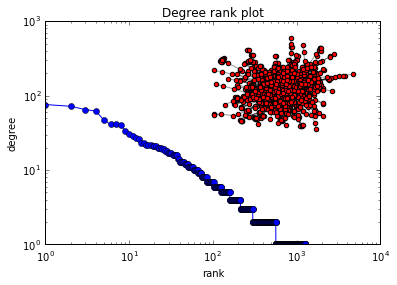

In [10]:
# degree rank plot (undirected)

degree_sequence=sorted(nx.degree(ugraph).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted(nx.connected_component_subgraphs(ugraph), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.show()

### Centrality

In [11]:
# degree centrality
a = nx.degree_centrality(graph)
dfIn=pd.DataFrame.from_dict(a,orient='index')
dfIn.columns = ['degree centrality']
dfIn = dfIn.sort_values(by=['degree centrality'])
dfIn

,degree centrality
financial collusion,0.000796
toxic heavy metal,0.000796
syncope,0.000796
labor and delivery floor,0.000796
human carcinogen,0.000796
dissenters,0.000796
generous,0.000796
trustworthy,0.000796
human muscle tissue,0.000796
parental right,0.000796


In [ ]:
# betweenness centrality
a = nx.betweenness_centrality(graph)
dfIn=pd.DataFrame.from_dict(a,orient='index')
dfIn.columns = ['betweenness centrality']
dfIn = dfIn.sort_values(by=['betweenness centrality'])
dfIn

In [ ]:
# closeness centrality
a = nx.closeness_centrality(graph)
dfIn=pd.DataFrame.from_dict(a,orient='index')
dfIn.columns = ['closeness centrality']
dfIn = dfIn.sort_values(by=['closeness centrality'])
dfIn

In [ ]:
# in degree centrality
a = nx.in_degree_centrality(graph)
dfIn=pd.DataFrame.from_dict(a,orient='index')
dfIn.columns = ['in deg centrality']
dfIn = dfIn.sort_values(by=['in deg centrality'])
dfIn

In [ ]:
# out degree centrality
b = nx.out_degree_centrality(graph)
dfIn=pd.DataFrame.from_dict(b,orient='index')
dfIn.columns = ['out deg centrality']
dfIn = dfIn.sort_values(by=['out deg centrality'])
dfIn

- - -

In [ ]:
# current-flow betweenness centrality (graph must be connected; run for largest component)
#nx.current_flow_betweenness_centrality(graph)

# eigenvector centrality

# degree assortativity coefficient
# average neighbor degree; average degree connectivity (k nearest neighbors)

#nx.edge_connectivity(graph)
#nx.node_connectivity(graph)

# clustering coefficient (cannot be multigraph)
# nx.average_clustering(graph)